<a href="https://colab.research.google.com/drive/1lxt-dCkUN9NuH4lGf8JrtcoLX5mgSXSr" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP1 AA1

**Horacio Facundo Vega**

## Indicaciones básicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# ENTREGA

* En el foro destinado a la tarea debe postear al menos tres veces:
  - La primera vez para indicar el dataset elegido
  - Una segunda vez para postear su entrega
  - Una tercera vez para brindar feedback a alguien más en el foro.
  - Puede comentar más de un posteo de sus compañeros siempre y cuando el intercambio sea respetuoso y fructífero.
* Deben postear como solución un enlace a su notebook colab público y también un enlace al mismo notebook alojado en su repositorio GitHub.
* Debe sumar el enlace a un video donde muestre su solución y explique lo realizado. Duración máxima: 5 minutos. Puede grabarse a Ud. mismo usando una sesión de zoom y grabar localmente. Puede subir el video a su youtube personal como privado o Unlisted.
* Enlaces no accesibles o enlaces erróneos es igual a determinar que la tarea no ha sido entregada. Corrobore la viabilidad de los enlaces que postea.


#**Tarea: Aplicación de Regresión Lineal y Análisis de Importancia de Variables**  
**Objetivo**: Aplicar un modelo de regresión lineal a un dataset de su elección, evaluar su rendimiento e identificar las variables más relevantes para la predicción.

---

# **Instrucciones**:

#1. **Selección del Dataset**  
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets/?Task=Regression&skip=0&take=10&sort=desc&orderBy=NumHits&search=  
   - Requisitos:  
     - Debe tener al menos 4 variables numéricas continuas (1 target, 3 o más features).  
     - Idealmente, que las features tengan distintas escalas o unidades ( no excluyente).
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligió. Continue al siguiente punto.  



## Resolución:

**Dataset: student performance**
* https://archive.ics.uci.edu/dataset/320/student+performance


## 2. **Análisis exploratorio (previo al modelado)**  
   - Describan las variables (media, distribución, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gráficos de dispersión (scatterplots) entre features y target.  
   - **Pregunta clave**: ¿Qué relaciones lineales preliminares observan?  


## Resolución:

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
url = "https://raw.githubusercontent.com/facundoVega/TP1-aa1-regresion-lineal/refs/heads/master/student-mat.csv"

df = pd.read_csv(url, sep=';')

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


* **Observando las caracteristicas de las variables del dataset**

In [52]:
df.describe()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [54]:
numerical_columns = df.select_dtypes(include=["number"]).columns
print(numerical_columns)

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')


Generando gráficos de dispersión

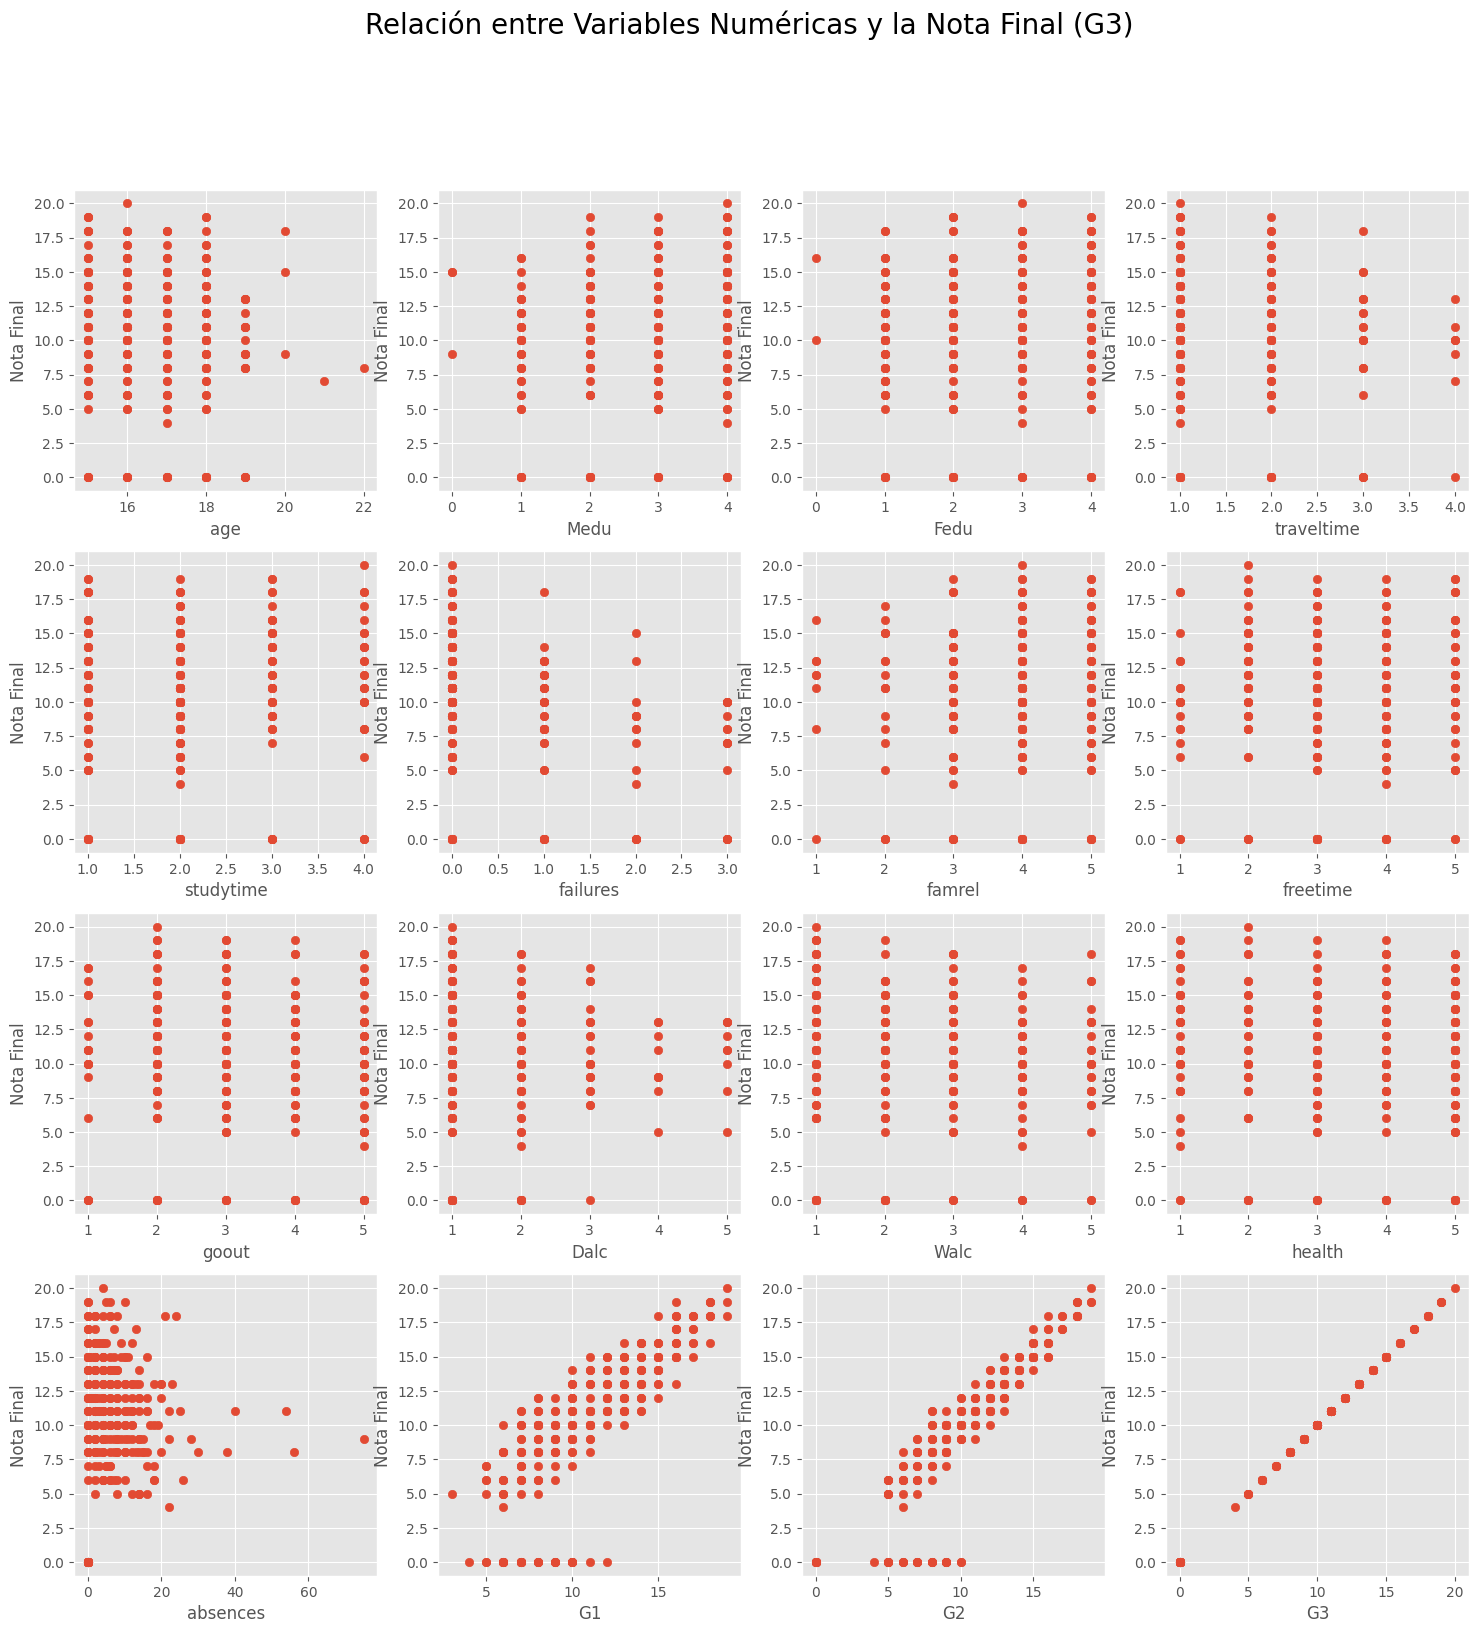

In [55]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (18, 18))

for index, feature_name in enumerate(numerical_columns):
    ax = fig.add_subplot(4, 4, index + 1)
    ax.scatter(df[feature_name], df["G3"])
    ax.set_ylabel('Nota Final', size = 12)
    ax.set_xlabel(feature_name, size = 12)
    
fig.suptitle('Relación entre Variables Numéricas y la Nota Final (G3)', fontsize=20)

plt.show()

Boxplots para ver distribucion de mis variables cuantitativas y detectar outliers

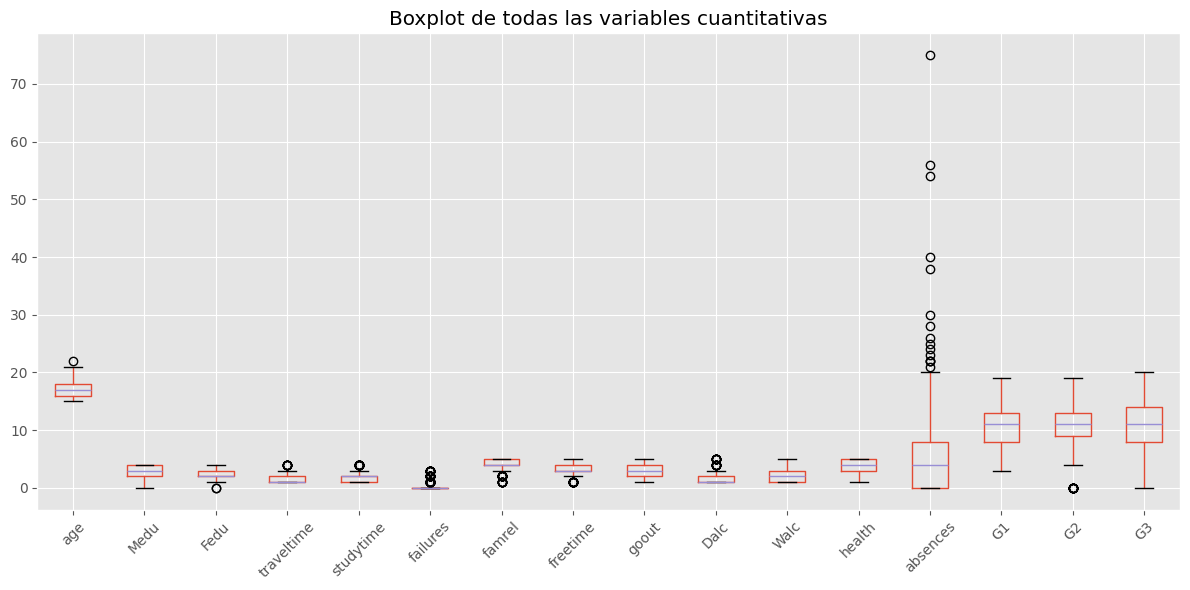

In [56]:
plt.figure(figsize=(12, 6))

variables_cuantitativas = df.select_dtypes(include='number')
variables_cuantitativas.boxplot()

plt.title('Boxplot de todas las variables cuantitativas')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

### Observaciones preliminares

**Observacion del gráfico de dispersión**:


Se puede ver una fuerte relación entre las features: "G1" y "G2" con el target "G3" (nota final). Esto se debe a que basicamente "G1" y "G2" son notas de los dos primeros períodos de evaluación, por lo que los alumnos que tengan una buena calificación en estos dos peróodos , por lo general tendrón una buena nota en el período final. Como el objetivo de mi modelo sera tratar de predecir la calificación de alumnos en matemáticas basandose en característiscas generales, vamos a eliminar estas dos predictores del entrenamiento , de manera de poder aplicar este modelo en cualquier instancia del año  en alumnos que no hallan pasado por estos períodos de evaluación. Otra razon mas técnica para eliminar estas dos features es que la técnica de minimos cuadrados por el cual se calculan los coeficientes del modelo de regresión lineal a utilizar, funciona mejor  cuanto mas autónomas son las variables predictoras.
Otra observación importante es que la mayoria de las features numéricas corresponden a categorías de 1 a 5. Es decir que aunque son variables númericas son cualitativas.

**Observacion del gráfico de cajas o boxplot**:

Se detectaron algunos outliers sobre todo en las features de  "ausencia" y "edad". Tambien se observa que las features manejan escalas diferentes ya que las cajas presentas diferencias en su tamaño y en valores mínimos y máximos, por lo que una normalización de mi dataset sera necesario. Con los outliers se aplicara una técnica dem winsorizacion ya que eliminar completamente la fila me haria perder información valiosa de otras features.

## 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cuáles features descarta. Justifique.
   - Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.
   - Escalen las features (p.ej., StandardScaler) para comparar coeficientes después.  
   - Dividan en train/test (70-30 o 80-20).  

## Resolución:

**Limpieza (Missing values y outliers)**

In [57]:
#Checkeando valores nulos
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Se aplica Winsorizacion solo en los outliers superiores ya que segun el boxplot nuestras features solo presentan  valores atípicos en estos extremos.

In [58]:
abscence_upper_limit =  round(df['absences'].quantile(0.95))
age_upper_limit = round(df['age'].quantile(0.95))

df['absences'] = df['absences'].clip(upper=abscence_upper_limit)
df['age'] = df['age'].clip(upper=age_upper_limit)
print(f"Valor maximo de ausencias luego del tratamiento de outliers: { df['absences'].max() } ")
print(f"Valor maximo de edades luego del tratamiento de outliers: { df['age'].max() } ")

Valor maximo de ausencias luego del tratamiento de outliers: 18 
Valor maximo de edades luego del tratamiento de outliers: 19 


**Eliminacion de features**

Se eliminan las features G2 y G3 debido a su multicolinealidad conlas otras predictoras.

In [59]:
excluded = ['G1', 'G2']

df = df[[col for col in df.columns if col not in excluded]]

df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3'],
      dtype='object')

Debido a  que el proposito de nuestro modelo sera predecir la nota final de un alumno en base a los hábitos, costumbres y características del mismo, las variables cualítativas nominales pueden ser removidas, ya que no me aportan ningun valor en este sentido. De todas maneras, algunas variables cualitativas binarias seran analizadas con un correlación de Pearson para ver si vale la pena utilizarlas como parte del entrenamiento del modelo.

In [60]:
#Eliminando variables nomianles
nominal_columns = [
    'Mjob', 'Fjob', 'reason', 'guardian'
]

df = df[[col for col in df.columns if col not in nominal_columns ]]

df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3'],
      dtype='object')

Las siguientes variables cualitativas binarias no me aportan valor en términos de lo que impacta a la nota de  un alumno, dede el punto de vista de sus hábitos de estudio, actividades, etc. Por ende se procede a eliminarlas.

In [61]:
#Eliminando variables binarias no necesarias
nominal_columns = [
     'school', 'famsize', 'Pstatus', 'nursery'
]

df = df[[col for col in df.columns if col not in nominal_columns ]]

df.columns

Index(['sex', 'age', 'address', 'Medu', 'Fedu', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G3'],
      dtype='object')

Elimino la feature address ya que puede ser inferida a travez de la feature traveltime.



In [62]:
df = df.drop(columns=['address'])

Ahora que tengo todas las features que a primera vista parecen importantes para mi modelo, voy a medir su nivel de importancia con mi variable objetivo utilizando la técnica de correlación de Pearson. Antes de aplicar esta técnica voy a transformar mis predictores categóricos binarios a numeros , utilizando "one hot encoding".

**One Hot Encoding para mis features categoricas binarias.**

In [63]:
binary_columns = [
    'sex','schoolsup', 
    'famsup', 'paid', 'activities', 'higher', 'internet',
    'romantic'
    ]

for col in binary_columns:
    unique_vals = df[col].unique()
    df[col] = df[col].map({unique_vals[0]: 0, unique_vals[1]: 1})

df.dtypes

sex           int64
age           int64
Medu          int64
Fedu          int64
traveltime    int64
studytime     int64
failures      int64
schoolsup     int64
famsup        int64
paid          int64
activities    int64
higher        int64
internet      int64
romantic      int64
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
G3            int64
dtype: object

Ahora que todas mis features son numericas checkeo correlacioón entre variables numéricas y variable target utilizando el metodo de correlación Pearson.

In [64]:
numeric_df = df.select_dtypes(include='number')

numeric_df.columns
correlations = numeric_df.corr()['G3'].sort_values()
print("Correlacion de Pearson con mi variable objetivo:")
print('*' * 48)
print(correlations)

Correlacion de Pearson con mi variable objetivo:
************************************************
failures     -0.360415
higher       -0.182465
age          -0.167196
goout        -0.132791
romantic     -0.129970
traveltime   -0.117142
health       -0.061335
Dalc         -0.054660
Walc         -0.051939
famsup       -0.039157
freetime      0.011307
activities    0.016100
famrel        0.051363
absences      0.070715
schoolsup     0.082788
studytime     0.097820
internet      0.098483
paid          0.101996
sex           0.103456
Fedu          0.152457
Medu          0.217147
G3            1.000000
Name: G3, dtype: float64


***Observaciones:***

Ningun variable demostro una correlación elevada ni negativa ni positiva , sin embargo para mi modelo utilizare las dos correlaciones negativas y positivas más elevadas efectuando asi un modelo de selección de features por filtrado.

**Variables a utilizar**


| Relacion Pearson Positiva  | Relacion Pearson Negativa            |
|----------------------------|--------------------------------------|
| Medu (Educacion Madre)     | Failures (Desaprobados previos)      |
| Fedu (Educacion Padre)     | Higher (Planificacion Universitaria) |


**Escalamiento de Features**

In [65]:
from sklearn.preprocessing import StandardScaler


features = df.drop(columns=['G3'])
target = df['G3']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
df_scaled['G3'] = target 

df_scaled.sample(7)

,sex,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
52,1.054656,-1.373024,1.143856,-0.479857,0.792251,-1.235351,0.896479,0.38504,-1.257656,-0.919671,...,-2.232677,-0.708450,1.178860,1.768808,1.700867,1.707469,1.328545,1.041070,0.167489,10
317,-0.948176,1.084731,1.143856,0.440257,-0.643249,1.150779,-0.449944,0.38504,0.795130,1.087346,...,0.447893,1.411533,0.062194,-0.236010,0.801479,-0.540699,-1.003789,1.041070,0.718808,9
91,-0.948176,-1.373024,1.143856,0.440257,-0.643249,-1.235351,-0.449944,0.38504,-1.257656,1.087346,...,0.447893,-0.708450,0.062194,1.768808,1.700867,-0.540699,0.551100,-1.839649,-0.200057,18
8,1.054656,-1.373024,0.229234,-0.479857,-0.643249,-0.042286,-0.449944,0.38504,0.795130,1.087346,...,0.447893,-0.708450,0.062194,-1.238419,-0.997295,-0.540699,-1.003789,-1.839649,-0.935149,19
16,-0.948176,-0.553773,1.143856,1.360371,-0.643249,1.150779,-0.449944,0.38504,0.795130,1.087346,...,0.447893,-0.708450,-1.054472,-1.238419,-0.097908,-0.540699,-0.226345,-1.119469,0.167489,14
312,1.054656,1.903983,-1.600009,-0.479857,-0.643249,-0.042286,0.896479,0.38504,-1.257656,-0.919671,...,0.447893,-0.708450,0.062194,1.768808,-0.997295,0.583385,-0.226345,0.320890,-0.383830,11
11,-0.948176,-1.373024,-0.685387,-1.399970,2.227751,1.150779,-0.449944,0.38504,0.795130,-0.919671,...,0.447893,-0.708450,1.178860,-1.238419,-0.997295,-0.540699,-1.003789,0.320890,-0.200057,12


**Diviendo entre set de entrenamiento y set de prueba**

Utilizando la técnica "Hold Out" en una proporción de 80 -20

In [66]:
X = df_scaled[['Medu', 'Fedu', 'failures', 'higher']].values
y = df_scaled['G3'].values


In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)




## 4. **Regresión Lineal**  
   - Ajusten un modelo de regresión lineal (usando `sklearn.linear_model.LinearRegression`).  
   - Obtengan:  
     - Coeficientes (pesos) del modelo.  
     - Evaluar métricas en el set de entrenamiento y en el de testeo: **R²**, MSE (error cuadrático medio), MAE.  


**Entrenando el modelo**

In [68]:
from sklearn import linear_model

# Creamos un objeto de la clase LinearRegression
reg_mul = linear_model.LinearRegression(fit_intercept=True)

# Entrenamos el modelo pasandole las variables independientes y dependiente
reg_mul.fit(X_train, y_train)

reg_mul

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


***Obteniendo Coeficientes y el intercepto***

In [69]:
print("Intercepto del modelo:", reg_mul.intercept_)

print("Coeficientes del modelo")
print("*" * 23)
coeficientes_df = pd.DataFrame()
coeficientes_df["Columnas"] = ['Medu', 'Fedu', 'failures', 'higher']
coeficientes_df['Coeficiente estimado'] = pd.Series(reg_mul.coef_)
coeficientes_df

Intercepto del modelo: 10.201340237872646
Coeficientes del modelo
***********************


,Columnas,Coeficiente estimado
0,Medu,0.562315
1,Fedu,-0.103013
2,failures,-1.243946
3,higher,-0.453811


**Analisis de métricas de mi modelo.**

Métricas en el set de Entrenamiento

In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Metricas en el set de entrenamiento: ")
print("*" * 35)

trained_predicted_y = reg_mul.predict(X_train)

mae = mean_absolute_error(y_train, trained_predicted_y)
print(f"Error Absoluto Medio (MAE)): {mae}")

mse = mean_squared_error(y_train, trained_predicted_y)
print(f"Error cuadrado Medio (MSE): {mse}")


r2 = r2_score(y_train, trained_predicted_y)
print(f"Coeficiente de determinacion (R2): {r2}")

Metricas en el set de entrenamiento: 
***********************************
Error Absoluto Medio (MAE)): 3.1063081043596856
Error cuadrado Medio (MSE): 16.830798620225657
Coeficiente de determinacion (R2): 0.12989155484551607


Métricas en el set de Evaluación

In [71]:
print("Metricas en el set de evaluacion: ")
print("*" * 35)

test_predicted_y = reg_mul.predict(X_test)

regression_mae = mean_absolute_error(y_test, test_predicted_y)
print(f"Error Absoluto Medio (MAE)): {regression_mae}")

regression_mse = mean_squared_error(y_test, test_predicted_y)
print(f"Error cuadrado Medio (MSE): {regression_mse}")


regression_r2 = r2_score(y_test, test_predicted_y)
print(f"Coeficiente de determinacion (R2): {regression_r2}")

Metricas en el set de evaluacion: 
***********************************
Error Absoluto Medio (MAE)): 3.7966262460312796
Error cuadrado Medio (MSE): 21.835157273975113
Coeficiente de determinacion (R2): 0.1778586547119304


### Observaciones del desempeño de mi modelo

* Se observa que el modelo tanto con los datos de entrenamiento  y los de prueba obtuvo métricas parecidas. Si bien habría que realizar cross-validation para un análisis mas exhaustivo y comparar las métricas con distintos datasets, los resultados de las métricas obtenidas podrían indicar que existe poca varianza en el modelo. Es decir que generaliza bastante bien y no esta sobreajustandose a los datos de entrenamiento. 
* Al momento de hacer las predicciones de las notas del alumno el modelo fallaría de media en tres puntos de calificación.
* El valor de coeficiente de determinación es realmente bajo , por lo que mi modelo no puede explicar la varianza de la variable objetivo a partir de las features.


## 5. **Importancia de Variables**  
   - Analicen los **coeficientes** del modelo:  
     - Valores absolutos altos → mayor impacto en el target.  
     - Signo: Relación positiva/negativa con el target.  
   - Comparen la magnitud de los coeficientes **escalados** (si usaron features en distintas unidades).  
   - **5.1. Opcional**:
     Otra forma es "desordenar" un feature y ver cómo empeora el modelo. Si al desordenarlo el error aumenta mucho, ese feature era importante. Usen métodos como:  
     - **Permutation Importance** (de sklearn) para validar importancia. Más info en https://scikit-learn.org/stable/modules/permutation_importance.html



## Resolución:

**Análisis de coeficientes**

In [72]:
print("Intercepto del modelo:", reg_mul.intercept_)

print("Coeficientes del modelo")
print("*" * 23)
coeficientes_df = pd.DataFrame()
coeficientes_df["Columnas"] = ['Medu', 'Fedu', 'failures', 'higher']
coeficientes_df['Coeficiente estimado'] = pd.Series(reg_mul.coef_)
coeficientes_df

Intercepto del modelo: 10.201340237872646
Coeficientes del modelo
***********************


,Columnas,Coeficiente estimado
0,Medu,0.562315
1,Fedu,-0.103013
2,failures,-1.243946
3,higher,-0.453811


* El coeficiente que mas aporta positivamente a la predicción del modelo es el que se corresponde con la feature: "educación de la madre" (Medu), lo cual tiene sentido, si visualizamos los valores obtenidos en la técnica de correlación de Pearson. Si bien el valor de relación era ligeramente positivo, era el más alto de todas las features.
* El coeficiente que mas aporta negativamente es el de "Clases desaprobadas previamente" (failures). Esto es esperable ya que alumnos que tienen mayor cantidad de clases previas desprobadas podrian tener mayores dificultades para obtener una buena calificación, lo cual podría explicar el impacto inverso de esta feature.
* El coeficiente que corresponde con el feature "higher" sorprendentemente tiene una relación negativa con el target. Sin embargo su valor es muy bajo y no es tan determinante para la predicción. Este feature trata sobre los planes del alumno a nivel universitario, la lógica hubiera indicado que esta feature tenga  mas peso a la hora de determinar la calificación del alumno y que su aporte al modelo sea positivo.

**Comparación de features escalados**

* Los features fueron escalados antes de entrenarse el modelo. 
* El dataset si bien contenía features en distintas escalas, como los features de edad y ausencias, muchas de las features eran numéricas pero categóricas. Es decir, indicaban categorías del 1 al 5, siendo 1 el nivel mas bajo de una categoría y 5 el mas alto. Esto fue importante ya que muchas de las features del dataset tenían la misma magnitud. Esto pudo ser notado gracias a los gráficos de dispersión, donde los puntos estaban segmendatos en valores del 1 al 5.
* De todas maneras, todas las features fueron escaladas para que su aporte al modelo este equilibrado.


## 6. **Reflexión**  
   - ¿Cuáles variables son más importantes según el modelo? ¿Coincide con su análisis exploratorio?  
   - ¿El modelo tiene buen rendimiento (R² alto, MSE bajo)? Si no, ¿a qué podría deberse?  



## Resolución:

* Segun el modelo, las variables mas importantes son: "Failures" y "Medu". Esto coincide con my análisis exploratorio ya que fueron seleccionadas a partir del método de selección de features por filtrado. Estas variables fueron las que mas correlación mostraban con la variable objetivo.

* El modelo tiene un Error medio cuadrado bastante alto y un R2 bastante bajo.Sin embargo basandonos en la métrica de Error absoluto medio podemos decir que el modelo de media erra por 3 puntos de calificación , teniendo en cuenta que el rango de calificaciones es de 1 a 20 se podría afirmar que generaliza bastante bien.
Para mejorar la métrica de MSE, se podría usar la técnica de Regularización de Ridge. Ya que existe un teorema matemático que indica que aplicando Ridge a un modelo de regresión  el valor de MSE es menor que solo ajustando los coeficientes con la técnica de cuadrados mínimos.


## **Bonus**:  
- Prueben eliminar variables "poco importantes" y reentrenar el modelo. ¿Mejora el rendimiento?  


---

### **Tips**:  
- Si el R² es muy bajo, revisen si hay relaciones no lineales (y consideren transformar features).  
- Documenten cada paso: ¡la trazabilidad es clave en ciencia de datos!  


**Fuentes de Inspiración para el análisis y código fuente**


* [Importancia de coeficientes en la regresión lineal](https://www.youtube.com/watch?v=d_5YFwnxvUE&t=4238s&pp=0gcJCfYJAYcqIYzv) 
* [Regularizacion y features filtering](https://www.youtube.com/watch?v=A_d8Dsc1jFM)
* [Métricas en modelos de Regresión](https://www.youtube.com/watch?v=TrzUlo4BImM&t=932s)
* [Validacion Cruzada](https://www.youtube.com/watch?v=Qnth2VXopLg)
* [Manejo de outliers](https://www.youtube.com/watch?v=3lQydBqWYk0)
* [Overfitting y underfitting](https://www.youtube.com/watch?v=cXLOZqWg01k) 
* Apuntes y codigos de ejemplos de clases.

https://colab.research.google.com/drive/1SOl4TgP9AmqQXUTR9F_witzfkfYr5UZH#scrollTo=BWxuPY7KLxUa


# TP 2 Multi Layer Perceptron
---

In [73]:
from sklearn.neural_network import MLPRegressor

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Funciones de ayuda

In [75]:
def entrenar_por_epocas(modelo, epochs):
    train_rmse = []
    val_rmse = []

    for epoch in range(epochs):
        modelo.fit(X_train, y_train)  # Continúa entrenando desde el estado anterior

        # Predicciones
        y_train_pred = modelo.predict(X_train)
        y_val_pred = modelo.predict(X_test)

        # Calcular RMSE
        train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
        val_rmse.append(np.sqrt(mean_squared_error(y_test, y_val_pred)))

    return train_rmse, val_rmse

def plot_comparar_prueba_entrenamiento(train_rmse, val_rmse):
    plt.figure(figsize=(12, 8), dpi=100)
    plt.plot(train_rmse, label='Entrenamiento')
    plt.plot(val_rmse, label='Validación')
    plt.xlabel("Época")
    plt.ylabel("RMSE")
    plt.title("Desempeño del modelo por época")
    plt.legend()
    plt.grid(True)
    plt.show()

def comparar_metricas_con_regresion(model):
    y_pred  = model.predict(X_test)

    mlp_mse = mean_squared_error(y_test, y_pred)
    mlp_mae = mean_absolute_error(y_test, y_pred)
    mlp_r2 = r2_score(y_test, y_pred)

    data = {
        'Métrica': ['MSE', 'MAE', 'R²'],
        'Regresion': [regression_mse, regression_mae, regression_r2],
        'MLP': [mlp_mse, mlp_mae, mlp_r2]
    }
    tabla = pd.DataFrame(data)  
    return tabla

### **Consigna 2.1)** Usar MLP con la librería MLP.

**Creo modelo básico con 3 capas ocultas.**

c:\Users\facundo.vega\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\facundo.vega\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\facundo.vega\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\facundo.vega\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

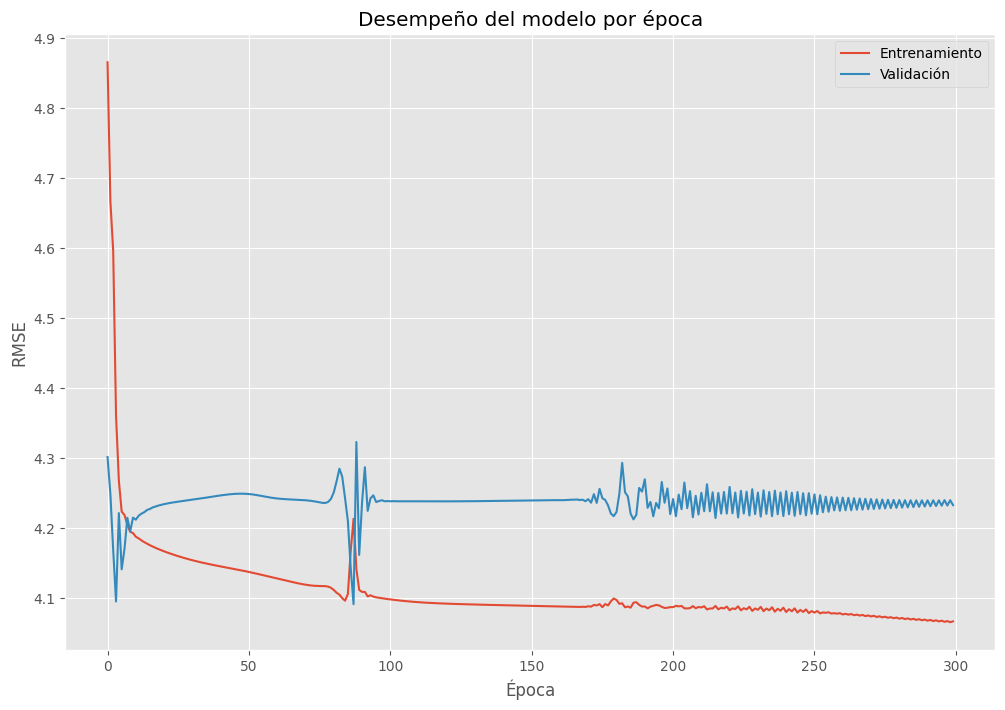

,Métrica,Regresion,MLP
0,MSE,21.835157,17.920581
1,MAE,3.796626,3.286521
2,R²,0.177859,-0.004311


In [83]:
# Crear el modelo con warm_start=True para entrenar por etapas
model = MLPRegressor(hidden_layer_sizes=(4, 4, 4),
                     activation='tanh',
                     solver='sgd',
                     learning_rate_init=0.1,
                     max_iter=1,  # Entrenamos de a 1 iteración por vez
                     warm_start=True,
                     random_state=42)


train_rmse, val_rmse = entrenar_por_epocas(model, 300)
plot_comparar_prueba_entrenamiento(train_rmse, val_rmse)
comparar_metricas_con_regresion(model)


**Observación:**
* En esta primeras observaciones se busca entender como se comporta el modelo época a época, para encontrar el número de iteraciones óptimas y poder proponer un arquitectura que funcione de manera aceptable.
* Se observa que el modelo tiende a sobreajustar al final de su entrenamiento.
* EL numero de iteraciones optimas para obtener un modelo que generalize mejor, esta entre aproximadamente 5 y 20.
* A nivel general, las métricas de la regresión lineal del modelo anterior son ligeramente mejores. 

**Misma arquitecture de Red neuronal pero esta vez utilizando optimizador Adam.**

c:\Users\facundo.vega\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\facundo.vega\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\facundo.vega\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\facundo.vega\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

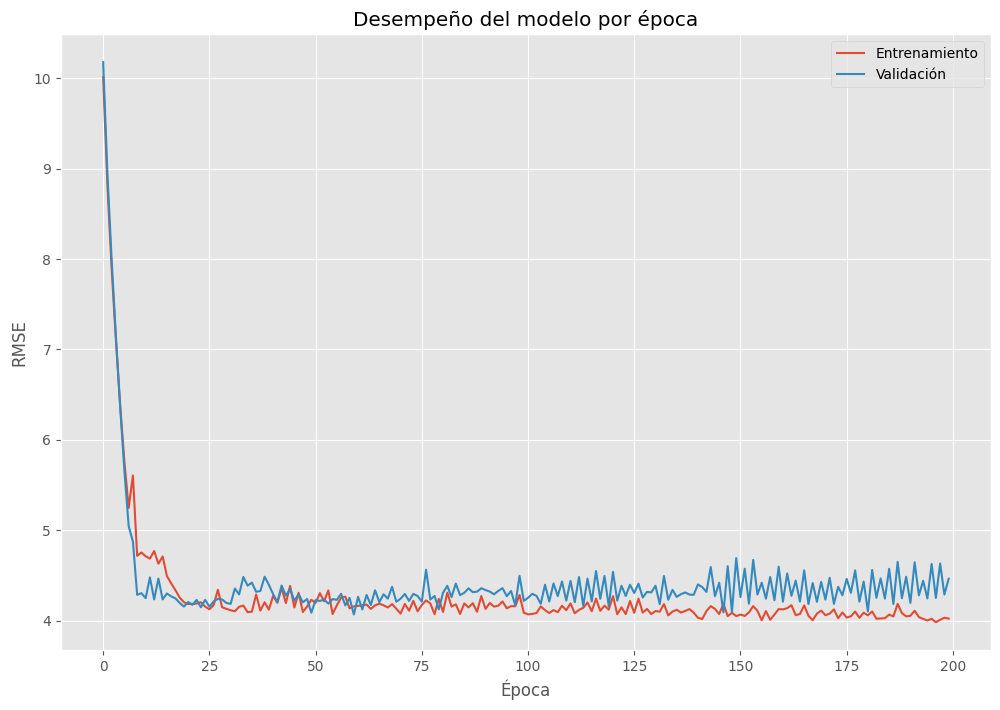

,Métrica,Regresion,MLP
0,MSE,21.835157,19.922091
1,MAE,3.796626,3.464193
2,R²,0.177859,-0.116480


In [77]:
model = MLPRegressor(hidden_layer_sizes=(4, 4, 4),
                     activation='tanh',
                     solver='adam',
                     learning_rate_init=0.1,
                     max_iter=1,  # Entrenamos de a 1 iteración por vez
                     warm_start=True,
                     random_state=42)


train_rmse, val_rmse = entrenar_por_epocas(model, 200)
plot_comparar_prueba_entrenamiento(train_rmse, val_rmse)
comparar_metricas_con_regresion(model)

**Observacion:**
* Al utilizar el optimizador "Adam" el cual utiliza mas información que solo el gradiente de descenso (como lo hace el optimizador "stocastic gradient descent") para ajustar los coeficientes , hemos conseguido menor fluctuación al momento de entrenar la red época a época por eso vemos las lineas mucho mas suavizadas con respecto a la arquitectura anterior. Sin embargo, las métricas obtenidas no son muy buenas ya que esta arquitectura predice notablamente peor teniendo un RMSE considerablemente mas alto que el modelo de regresión lineal y que la arquitectura MLP propuesta anteriorment.

### **Consigna 2.4 -  Caso donde MLP funciona de forma aceptable** <br>


c:\Users\facundo.vega\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\facundo.vega\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\facundo.vega\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\facundo.vega\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

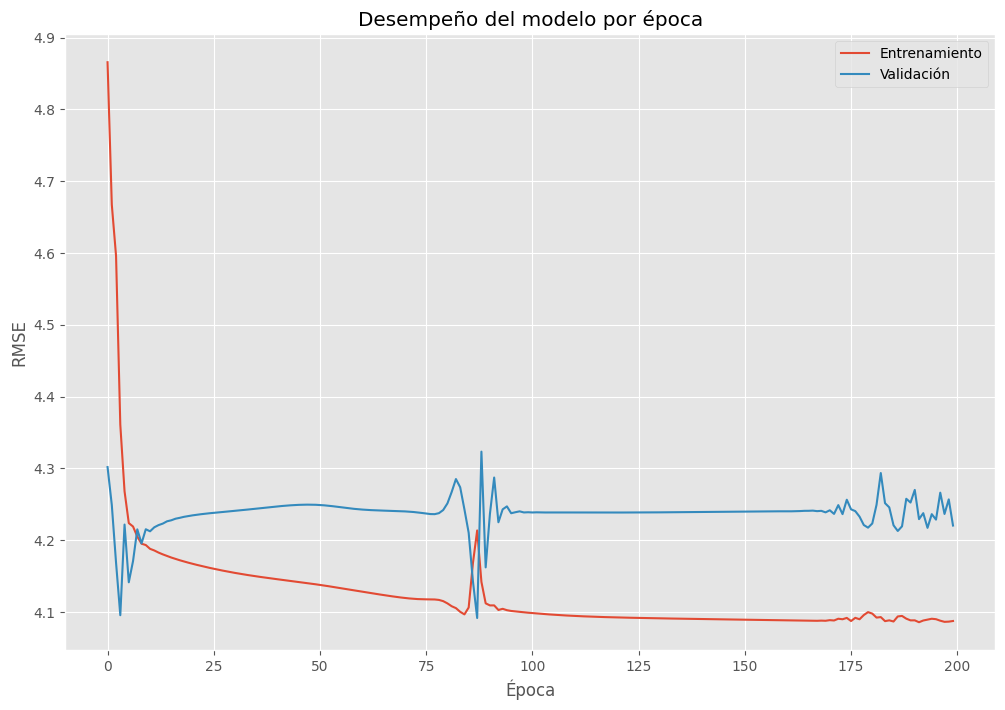

,Métrica,Regresion,MLP
0,MSE,21.835157,17.812651
1,MAE,3.796626,3.289451
2,R²,0.177859,0.001738


In [84]:
model = MLPRegressor(hidden_layer_sizes=(4, 4, 4),
                     activation='tanh',
                     solver='sgd',
                     learning_rate_init=0.1,
                     max_iter=1,  # Entrenamos de a 1 iteración por vez
                     warm_start=True,
                     random_state=42)

train_rmse, val_rmse = entrenar_por_epocas(model, 200)
plot_comparar_prueba_entrenamiento(train_rmse, val_rmse)
comparar_metricas_con_regresion(model)

**Observacion:**
* Para este entrenamiento se utilizaron 200 iteraciones ya que como vimos en los plots anteriores, ese era el numero óptimo
para tener un modelo que generalize mejor.
* El optimizaidor seleccionado fue SGD ya que en el analisis previo demostro ser el que mejor métricas generaba en el modelo.
* De esta forma conseguimos un modelo con las métricas muy cercanas al de regresion lineal e incluso logramos aumentar el coeficiente de determinación de nuestra red neuronal (Aunque sigue siendo bajo)  en comparación con las primeras arquitecturas propuestas.


### **Consigna 2.2 -  Presentar un caso donde la MLP sobreajuste**
**Overfitting**

**Pruebo con una arquitectura de red neuronal un poco mas compleja agreando una capa oculta mas**

c:\Users\facundo.vega\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\facundo.vega\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\facundo.vega\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\facundo.vega\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

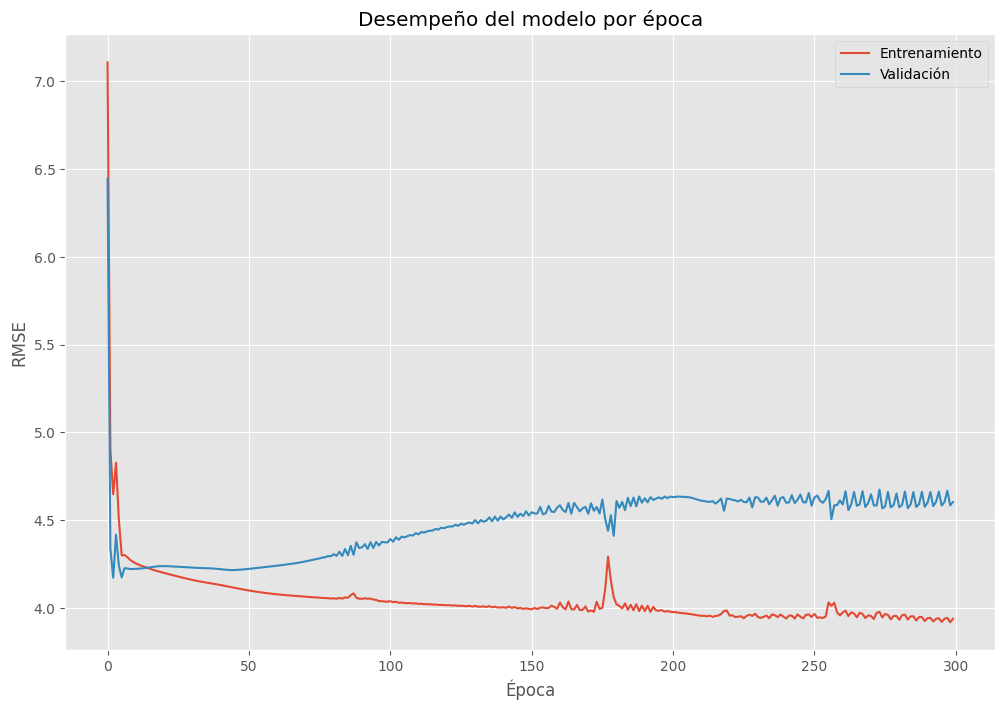

,Métrica,Regresion,MLP
0,MSE,21.835157,21.193170
1,MAE,3.796626,3.524689
2,R²,0.177859,-0.187715


In [87]:
model = MLPRegressor(hidden_layer_sizes=(10, 10, 10),
                     activation='tanh',
                     solver='sgd',
                     learning_rate_init=0.1,
                     max_iter=1, 
                     warm_start=True,
                     random_state=42)

train_rmse, val_rmse = entrenar_por_epocas(model, 300)
plot_comparar_prueba_entrenamiento(train_rmse, val_rmse)
comparar_metricas_con_regresion(model)



**Observación:**

* El gráfico nos muestra que esta arquitectura de red neuronal, predice considerablemente mejor con los datos de entrenamientos que con los de prueba.
* Esto es por que el MLP memorizo bien los datos de entrenamiento pero no aprendio patrones que ayuden a hacer predicciones precisas, es decir se sobreajusto a los datos de entrenamientos por lo tanto esta overfitteando.
* Para provocar este overfitting se añadieron capas ocultas ya que sabemos que modelos mas complejos tienden a sobreajustarse a los datos de entrenamiento.
* Tambien se utilizaron un mayor numero de épocas para forzar este overfitting.
* A causa de este overfitting es por lo que se puede observar mayor varianza entre los resultados de predicción con el set de entrenamiento y el de prueba.

### **Consigna 2.3 -   Presentar un caso donde la MLP subajuste.**

**Pruebo con una arquitectura de red neuronal un poco mas simple con menos capas y menos epocas**

c:\Users\facundo.vega\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\facundo.vega\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\facundo.vega\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\facundo.vega\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

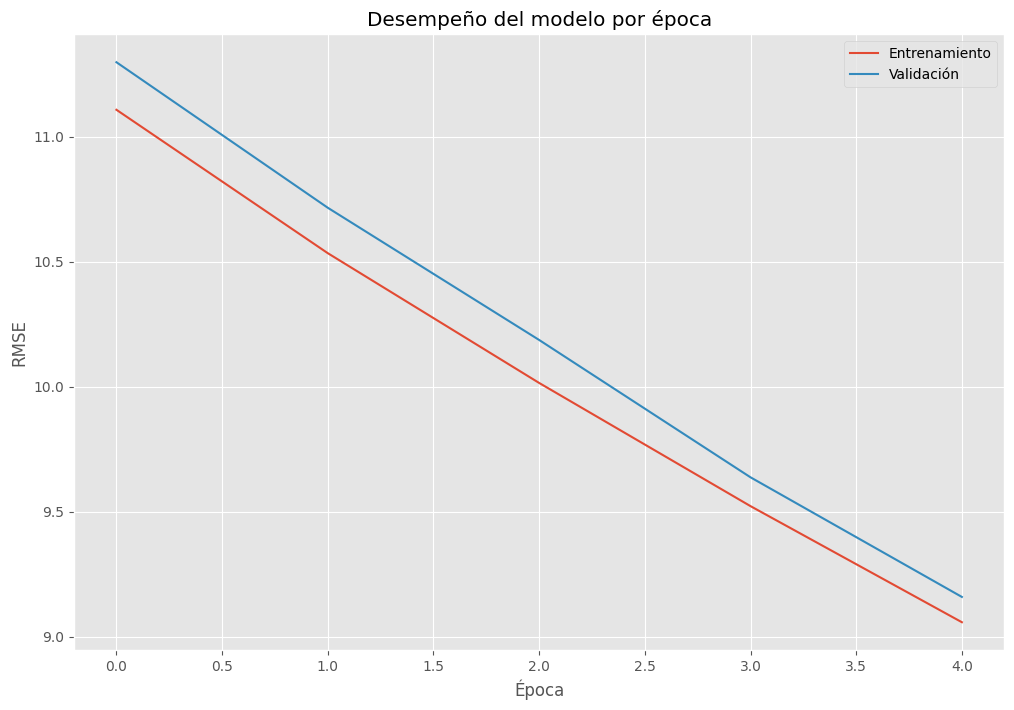

,Métrica,Regresion,MLP
0,MSE,21.835157,83.877929
1,MAE,3.796626,8.467886
2,R²,0.177859,-3.700715


In [80]:
train_rmse = []
val_rmse = []

# Crear el modelo con warm_start=True para entrenar por etapas
model = MLPRegressor(hidden_layer_sizes=(1, 1),
                     activation='tanh',
                     solver='adam',
                     learning_rate_init=0.1,
                     max_iter=1,  # Entrenamos de a 1 iteración por vez
                     warm_start=True,
                     random_state=42)

# Número de épocas
train_rmse, val_rmse = entrenar_por_epocas(model, 5)
plot_comparar_prueba_entrenamiento(train_rmse, val_rmse)
comparar_metricas_con_regresion(model)

**Observación:** 

* Para generar este underfitting o subajuste en el MLP , se redujo el numero de épocas durante el proceso de entrenamiento, básicamente para no darle mucho tiempo a la arquitectura para poder encontrar patrones en los datos.
* Tambien se uso un numero muy chico de neuronas y de capas, haciendo que el modelo no sea lo suficientemente complejo para captar los patrones de mi dataset.
* El optimizador utilizado Adam,  el cual va minimizando la funcion de error y ajustando los coeficientes mas lentamente, tambien fue una causa de este subajuste, ya que no pudo minimizar la funcion de error lo suficiente en la cantidad de épocas que use para entrenar el modelo.
* Por estos parámetros seleccionados al entrenar el modelo, es que estamos en presencia de un underfitting, si vemos las métricas del plot , el modelo presenta un alto nivel de Bias, lo cual es un síntoma propio del underfitting.

### **Consigna 2.5 -   Conclusiones.**

**Comparando modelo MLP con modelo Linear Regression**

* Las métricas obtenidas para MSE en ambos modelos fue parecida, pero en la red neuronal mi arquitectura presentaba menor varianza y generalizaba mucho mejor.
* Esto puede dar la pauta que a travez de la red neuronal el modelo fue capaz de encontrar relaciones abstractas mas complejas que mi modelo de regresion lineal no era capaz de captar.
* Si tuviera que elegir un modelo para continuar el entrenamiento seria el de MLP, ya que todavia puedo aplicarle mas técnicas de regularizacion para hacer que mejore sus predicciones.
* Tambien es importante considerar que el dataset utilizado tiene poca cantidad de registros, lo cual puede ser una de las causas que hace que el modelo tanto de red neuronal como de regresión lineal no genaralizen tan bien. Una recomendación para investigar a futuro es usar cross validation y hacer una comparación exhaustiva de ambos modelos.

**Fuentes de Inspiración para el análisis y código fuente**

* Apuntes y artículos de clase.
* [Perceptron y Neurona (Teoría básica)](https://www.youtube.com/watch?v=AWx80B5lsEg&t=6s) 
* [De una Neurona a una red Neuronal- (Teoría básica)](https://www.youtube.com/watch?v=zsKmg9GPdFY)
* [Perceptrón fundamentos](https://www.youtube.com/watch?v=dkhXGTersP0)